In [ ]:
#!pip install pydub

In [ ]:
from pydub import AudioSegment
#import cv2
from PIL import Image

import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack as fftpk
import numpy as np
from numpy import asarray
from matplotlib import pyplot as plt

In [ ]:
newAudio = 'bird1.wav'
sound = AudioSegment.from_ogg("XC124794.ogg")
sound.export(newAudio, format="wav")

<_io.BufferedRandom name='bird1.wav'>

In [ ]:
s_rate, signal = wavfile.read(newAudio)

In [ ]:
if signal[0].size == 2:
  signal = signal[:,0]
  #print(signal)

In [ ]:
FFT = scipy.fft.fft(signal)
PSD = abs(FFT)
freqs = fftpk.fftfreq(len(PSD), (1.0/s_rate))

1


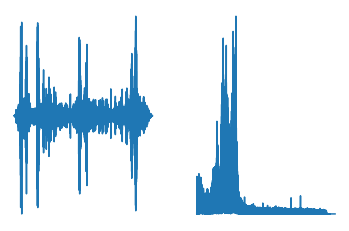

In [ ]:
print(signal[0].size)
figure, axis = plt.subplots(1, 2)
axis[0].plot(signal)
axis[0].axis('off')

axis[1].plot(freqs[range(len(PSD)//2)], PSD[range(len(PSD)//2)])
axis[1].axis('off')
plt.show()

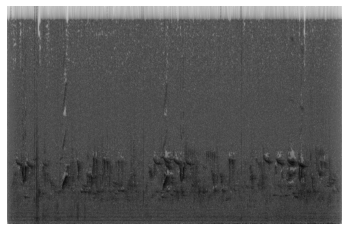

580032


In [ ]:
arr = plt.specgram(signal,NFFT=1024,Fs=s_rate, cmap='Greys') #gray_r for inverse grayscale or binary for something else not bad

#plt.ylim(0, 6000)
plt.axis("off")
plt.savefig("bird1.png", bbox_inches="tight", pad_inches = 0.0)
#plt.colorbar()
plt.show()
duration_in_milliseconds = len(signal)
print(duration_in_milliseconds)
sliceLen = duration_in_milliseconds / 4
sliceLen = int(sliceLen)
sliceLen = 2*s_rate
vmax=arr[0].max()
vmin=arr[0].min()

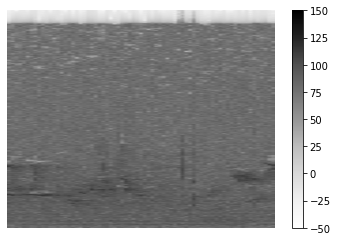

In [ ]:
# split signal in 5-second slices WITH FIXED SCALE
for i in range(0,4):
  slice1 = signal[sliceLen*i:sliceLen*(i+1)]
  plt.specgram(slice1,NFFT=1024,Fs=s_rate, cmap='Greys')
  plt.axis("off")
  plt.clim(-50, 150)
  #plt.show()
  plt.savefig(("bird_" + str(i) + ('.png')), bbox_inches="tight", pad_inches = 0.0)
  
plt.colorbar() 
plt.show()

In [ ]:
img_shape = (224,224)
img = Image.open('bird_3.png').convert('L').resize(img_shape)
data = asarray(img)
Image.fromarray(data)
#data.shape

In [ ]:
img = Image.open('bird_3.png').convert('L')

In [ ]:
# split signal in 5-second slices WITHOUT FIXED SCALE
figure, axis = plt.subplots(1, 4)
slice1 = signal[0:sliceLen]
axis[0].specgram(slice1,NFFT=1024,Fs=s_rate, cmap='Greys')
#axis[0].set_ylim(0, 6000)
axis[0].axis("off")
slice2 = signal[sliceLen:sliceLen*2]
axis[1].specgram(slice2,NFFT=1024,Fs=s_rate, cmap='Greys')
#axis[1].set_ylim(0, 6000)
axis[1].axis("off")
slice3 = signal[sliceLen*2:sliceLen*3]
axis[2].specgram(slice3,NFFT=1024,Fs=s_rate, cmap='Greys')
#axis[2].set_ylim(0, 6000)
axis[2].axis("off")
slice4 = signal[sliceLen*3:sliceLen*4]
axis[3].specgram(slice4,NFFT=1024,Fs=s_rate, cmap='Greys')
#axis[3].set_ylim(0, 6000)
axis[3].axis("off")

#plt.axis("off")
plt.show()
